# Final Project
---


## Group Members
---
- Jovan Limosnero
- Paris Do
- Mackenzie Duerksen
- Micaela Kingman
- Sophia Krause-Levy

#### Contributions: 
Everyone contributed equally. We met up and worked together for most of the project. Paris and Sophia did slightly more programming and Jovan, Mackenzie and Micaela did more of the comments and conclusion — overall equal work

## Setup
---

### Introduction
For this project, we are testing the assumption that there exists a relationship between the amount of street lights and crime such that areas with less light are more susceptible to crime. There may be  limited contextual representation as there may be, for example, gated communities or neighborhoods with low light, but low crime rate as well that might confound our research. Also, using a large amount of information for all of San Diego, it may be quite certain that nuances in the dynamics of communities may affect our findings as some neighborhoods could counter our hypothesis. 

It is also important to remember that there is not much research done on occurrences of crime during the day or night on this topic, so it might be difficult to find a clear correlation between crime and lighting, and we may have to look at key times during the day when street lights would be needed. It would be also interesting to see how those dynamics change depending on the time of the year/season. During Holiday Season would, in theory, increase the level of crime. So the time of year would need to be monitored in our data analysis as well as time of day. If for some reason, more lighting in neighborhoods doesn’t correlate to less crime, as stated before, we would likely need to consider other dynamics in the system. 
 

### Research Question: 
Do areas in San Diego with less streetlights have higher crime rate?

### Hypothesis: 
Our prediction is that areas in San Diego with more street lighting will have lower crime rates than areas that have less street lights. We believe that less street lighting indicates a higher likelihood of crimes in an area.

### Datasets:
Dataset #1:
- Dataset Name:  Dataset Name: San Diego Regional Crime Incidents 2013 - 2017 (incidents - 100k) (crimes.csv)
- Link to the dataset: http://data.sandiegodata.org/dataset/clarinova_com-crime-incidents-casnd-7ba4-extract 
- Number of observations: 100,000
- Description: This dataset lists the mm/dd/yy time, address, community, etc. It can be used to map out where crimes occur in San Diego and the times of day

Dataset #2:
- Dataset Name: San Diego Street Light Locations (street_lights.csv)
- Link to the dataset: http://data.sandiegodata.org/dataset/clarinova_com-street_lights-casnd-429e-extract
- Number of observations: 47,000+
- Description: This dataset lists the longitude, latitude, city, neighborhood, and community of street lights in San Diego. It can be used to find locations in San Diego that are most lit. 

Dataset #3:
- Dataset Name: neighborhoods.csv
- Link to the dataset:  https://docs.google.com/spreadsheets/d/1tvXZKjyh5tdKHF2TUbQvW0hJoSjoG6dK4pA2SD-2pu4/edit#gid=2
- Number of observations: 125
- Description: This data set shows the full names of the neighborhoods based on the abbreviations listed in datasets #1 and #2

Dataset #4:
- Dataset Name: populations.csv
- Link to the dataset: http://www.city-data.com/indexes/neighborhoods/CA/1/
- Number of observations: 121
- Description: This data was manually input to create a list of the populations for each neighborhood in San Diego.

Combining the Datasets: We are combining datasets #1 and #2 by comparing locations for crimes and the time of day with where street lights are located within the city to see which areas may need more lighting as well as more police patrolling. Dataset #3 is used to grab the real names of each neighborhood and dataset #4 is used to get the population of each neighborhood.


### Background: 

San Diego is a large county and unfortunately there are many areas that are not well lit, even in nicer areas such as the UCSD campus. Lighting adds a sense of security when people are walking home alone at night. This is especially important in areas such as San Diego, where a large portion of the population must use public transportation, many often not coming home until well after dark. People we know often opt out of walking alone at night because dark areas, even in wealthy neighborhoods, are presumed to be less safe. This assumption led us to wonder how much lighting truly does affect crime rates and what can be done to lower them.

The research of  Brandon P. Welsh, David C. Farrington (2008), showed two main reasons for reduced crime rates due to an increase of street lighting. The first reason is simply the idea of deterrence, well lit areas can be viewed more easily and therefore criminals are more likely to be seen and therefore are less likely to commit crimes in those areas. The second reason, which Welsh and Farrington found to be even more causal, was that adding street lights to areas signified community improvement as well as investment in a given area. A neighborhood that is improving is less likely to have crimes. The research did not show a difference in the decrease of daytime v. nighttime crimes which indicates that the lighting itself did not simply deter criminals when it was most useful, but instead overall. This suggests that adding street lights to areas may be enough to curb crimes during the day as well. 

Another study done by Steinbach, Perkins, et. al. (2015) researched how the reduction in street lighting in England and Wales would affect crime and traffic incidents. They found that dimming lights, turning some off permanently and lowering the number of hours the lights were on per day did not affect the crime rates in the areas. This seems to coincide with the research done by Brandon P. Welsh, David C. Farrington (2008), in showing that the lights themselves may make a difference in crime rates but the time of day and how long the lights are on does not. These papers along with others show a correlation between street lights and crime rates but that the lighting itself does not make the difference. This is something we plan on analyzing through our data analysis to see if there are areas in San Diego that would benefit from the introduction of more street lights and if it would lower crime rates in the given areas.

### References:
- 1) https://www.crimesolutions.gov/PracticeDetails.aspx?ID=38 

- 2) http://www.crim.cam.ac.uk/people/academic_research/david_farrington/light.pdf

- 3) http://jech.bmj.com/content/early/2015/07/08/jech-2015-206012

## Imports
---

In [1]:
# Imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind
import math

## 1. Load & Clean Data

Here we are removing unnecessary rows and information from the datasets we will be using. We create dataframes with pertinent information for analysis below.

---

### 1.1 Import Data & Create Dataframes

In [2]:
# Import the data in the file 'street_lights.csv' into a DataFrame called 'df_lights'.
df_lights = pd.read_csv('street_lights.csv')

In [3]:
# Import the data in the file 'crimes.csv' into a DataFrame called 'df_crimes'.
df_crimes = pd.read_csv('crimes.csv')

In [4]:
# Import data in the file 'populations.csv' into a DataFrame called 'df_populations'.
df_populations = pd.read_csv('populations.csv')

In [5]:
# Import neighborhood reference table into a DataFrame called "df_neighborhoods"
df_neighborhoods = pd.read_csv('neighborhoods.csv')
df_crimes['nbrhood'] = df_crimes['nbrhood'].map(df_neighborhoods.set_index('code')['name'])
print (df_neighborhoods[:10])

     code                   name
0  SanADM            Adams North
1  SanALL         Allied Gardens
2  SanALT             Alta Vista
3  SanAZL  Azalea/Hollywood Park
4  SanBAL            Balboa Park
5  SanBAR           Barrio Logan
6  SanBAH                 Bay Ho
7  SanBAP               Bay Park
8  SanBAT           Bay Terraces
9  SanBIR               Birdland


### 1.2 Clean Crime Data

In [6]:
# Clean crime data by dropping unnecessary rows
df_crimes = df_crimes.drop(['id', 'comm_pop', 'council', 'community', 'date', 'year', 'coun_pop', 'day', 'desc', 'address', 'city', 'week','dow','hour','month', 'segment_id', 'time', 'asr_zone', 'gctype', 'gcquality'], axis=1)

# Drop rows where crime type is fraud
df_crimes = df_crimes[df_crimes.type != "FRAUD"]

# Drop rows where neighborhood is qualcom
df_crimes = df_crimes[df_crimes.nbrhood != "Qualcomm"]

# Drop rows where neighborhood is petco park
df_crimes = df_crimes[df_crimes.nbrhood != "Petco Park"]

# Drop rows where neighborhood is torrey preserves
df_crimes = df_crimes[df_crimes.nbrhood != "Torrey Preserve"]

# Drop rows where neighborhood is border
df_crimes = df_crimes[df_crimes.nbrhood != "Border"]

# Night time crime data
df_crimes_night = df_crimes[df_crimes.is_night != 0]

# Day time crime data
df_crimes_day = df_crimes[df_crimes.is_night != 1]

In [7]:
# Print 1st 20 rows of data on crimes during the day
df_crimes_day[:20]

,is_night,type,nbrhood,lampdist,lat,lon
0,0,WEAPONS,Rancho Penasquitos,3162,32.957337,-117.143777
3,0,DRUGS/ALCOHOL VIOLATIONS,North Park,1414,32.757287,-117.129870
5,0,ROBBERY,Clairemont Mesa East,9899,32.820347,-117.182419
8,0,VEHICLE BREAK-IN/THEFT,Mission Valley East,4000,32.774932,-117.144025
9,0,DRUGS/ALCOHOL VIOLATIONS,Talmadge,2236,32.755078,-117.099457
10,0,VEHICLE BREAK-IN/THEFT,Serra Mesa,3000,32.791932,-117.126213
13,0,ASSAULT,Scripps Ranch,6082,32.911808,-117.102657
14,0,DRUGS/ALCOHOL VIOLATIONS,East Village,1414,32.708885,-117.153727
17,0,BURGLARY,Mira Mesa,6324,32.904084,-117.133818
18,0,VANDALISM,Scripps Ranch,2236,32.919065,-117.084075


In [8]:
# Print 1st 20 rows of data on crimes at night
df_crimes_night[:20]

,is_night,type,nbrhood,lampdist,lat,lon
2,1,ASSAULT,Pacific Beach,2236,32.796761,-117.254577
4,1,ASSAULT,North Clairemont,6082,32.836098,-117.206645
6,1,SEX CRIMES,East Village,1414,32.707287,-117.158730
7,1,BURGLARY,North Clairemont,12000,32.836803,-117.208681
11,1,ARSON,Hillcrest,2236,32.749915,-117.162472
12,1,VEHICLE BREAK-IN/THEFT,Tierrasanta,12000,32.819463,-117.110901
15,1,DRUGS/ALCOHOL VIOLATIONS,Core-Columbia,1414,32.716243,-117.155610
16,1,MOTOR VEHICLE THEFT,Point Loma Heights,7615,32.744593,-117.225853
21,1,VEHICLE BREAK-IN/THEFT,Ocean Crest,1000,32.576867,-117.024998
23,1,SEX CRIMES,Grantville,3162,32.787687,-117.097248


### 1.3 Clean Street Light Data & Create Dataframes

In [9]:
# Clean street light data but dropping unneeded rows
df_lights = df_lights.drop(['OGC_FID', 'GEOMETRY', 'streetlights_id', 'city','community', 'polenum', 'sapid', 'eqpid', 'status', 'x', 'y', 'council'], axis=1)

# Convert neighborhood codes to names
df_lights['neighborhood'] = df_lights['neighborhood'].map(df_neighborhoods.set_index('code')['name'])

# Drop rows where neighborhood is qualcomm
df_lights = df_lights[df_lights.neighborhood != "Qualcomm"]

# Drop rows where neighborhood is petco park
df_lights = df_lights[df_lights.neighborhood != "Petco Park"]

# Drop rows where neighborhood is torrey preserves
df_lights = df_lights[df_lights.neighborhood != "Torrey Preserve"]

# Drop rows where neighborhood is border
df_lights = df_lights[df_lights.neighborhood != "Border"]

## 2. Exploratory Data Visualization

Here we are exploring the data by checking basic properties of the data. This serves as a way to get a 'feel' for the data, and to look for any quirks or oddities about the data, that may indicate issues that need resolving.

 ---
 
### Key:
- Red = Street lights
- Green = all crimes
- Blue = night time crimes
- Orange = day time crimes


### 2.1 Scatter Plot Visualizations
Scatter plots are used to represent the relationships and correlations between location and street lights, as well as location and crimes.  We used scatter plots following the key above to visualize these locations.

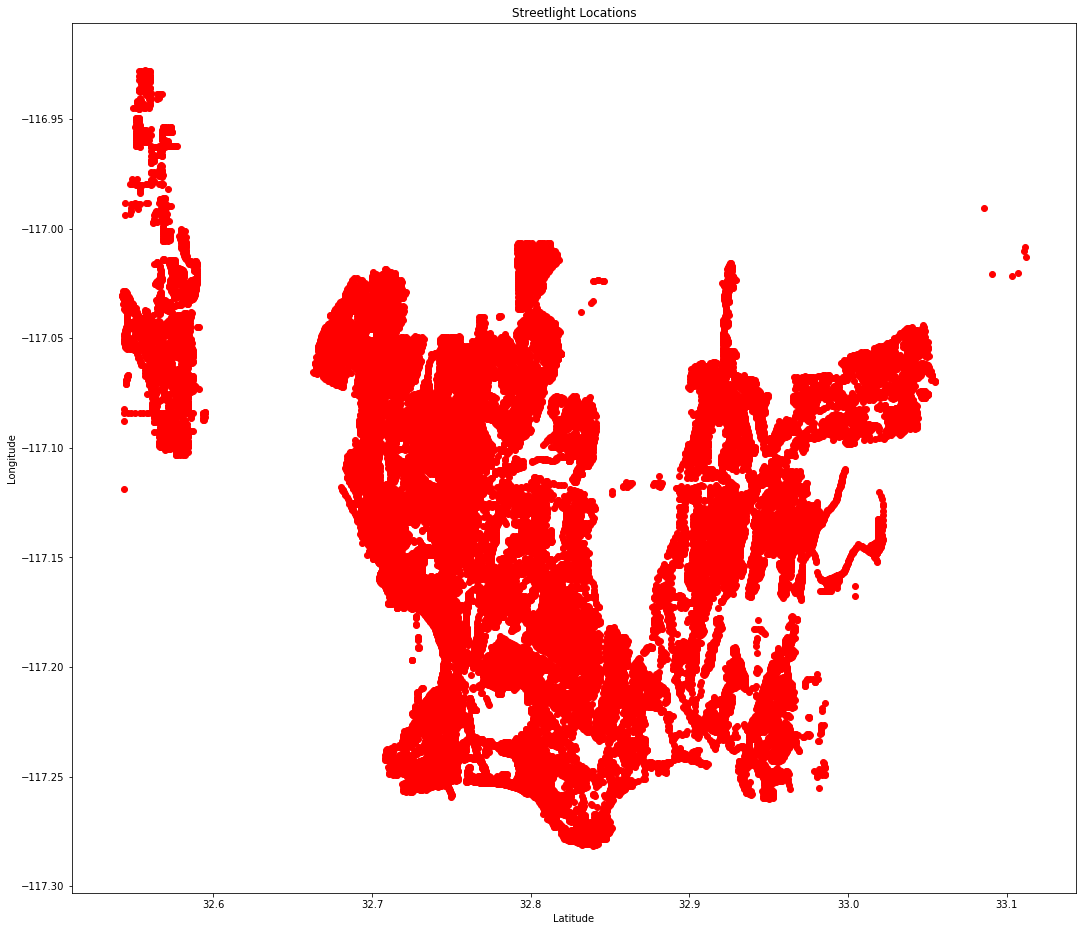

In [10]:
# Figure 2.1.1 Scatter plot of street lights (longitude vs. latitude)
plt.figure(figsize=(18, 16))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Streetlight Locations')
fig1 = plt.scatter(df_lights['lat'], df_lights['lon'], color='red')

#### Figure 2.1.1 

This scatter plot (red) displays the distribution of street lights in San Diego based on street light locations (longitude/latitude). This shows the areas where street lights are in San Diego.


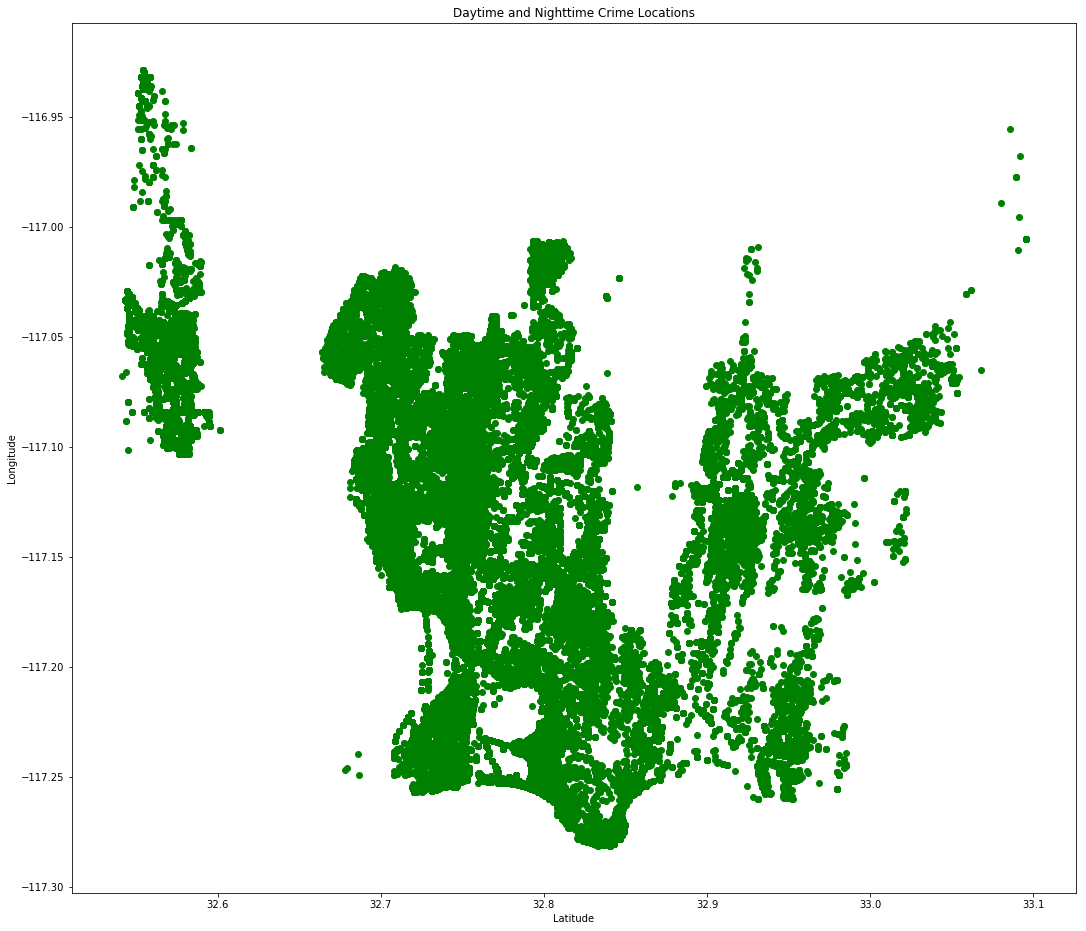

In [11]:
# Figure 2.1.2 Scatter plot of crimes during day and nighttime (longitude vs. latitude)
plt.figure(figsize=(18, 16))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Daytime and Nighttime Crime Locations')
fig2 = plt.scatter(df_crimes['lat'], df_crimes['lon'], color="green")

#### Figure 2.1.2
This scatter plot (green) displays the distribution crimes, in regards to the crime’s location (longitude/latitude). We assume the negative area in this scatter plot represents areas not inhabited by civilians, and thus are areas that are unlikely to have crimes take place.


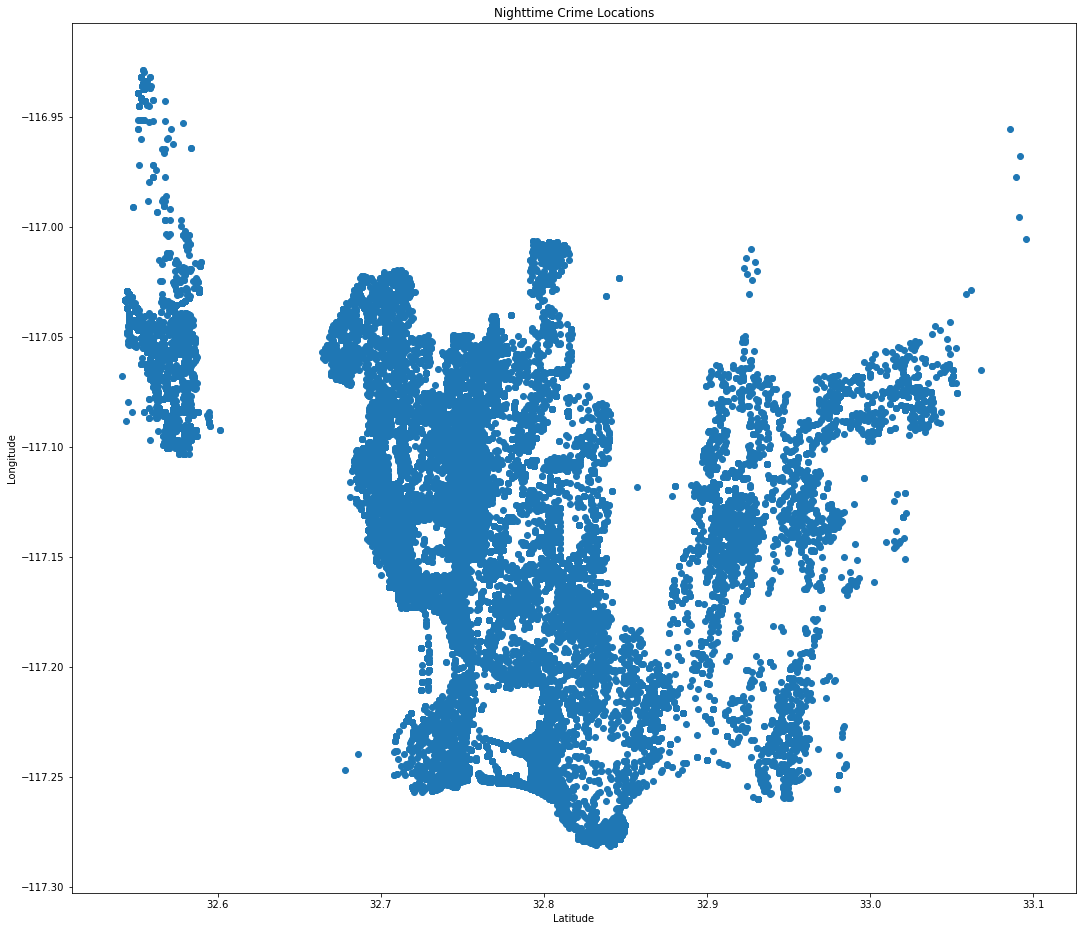

In [12]:
# Figure 2.1.3 Scatter plot of crimes during the nighttime (longitude vs. latitude)
plt.figure(figsize=(18, 16))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nighttime Crime Locations')
fig3 = plt.scatter(df_crimes_night['lat'], df_crimes_night['lon'])

#### Figure 2.1.3
This scatter plot (blue) displays the distribution crimes during the night in regards to the crime’s location (longitude/latitude).

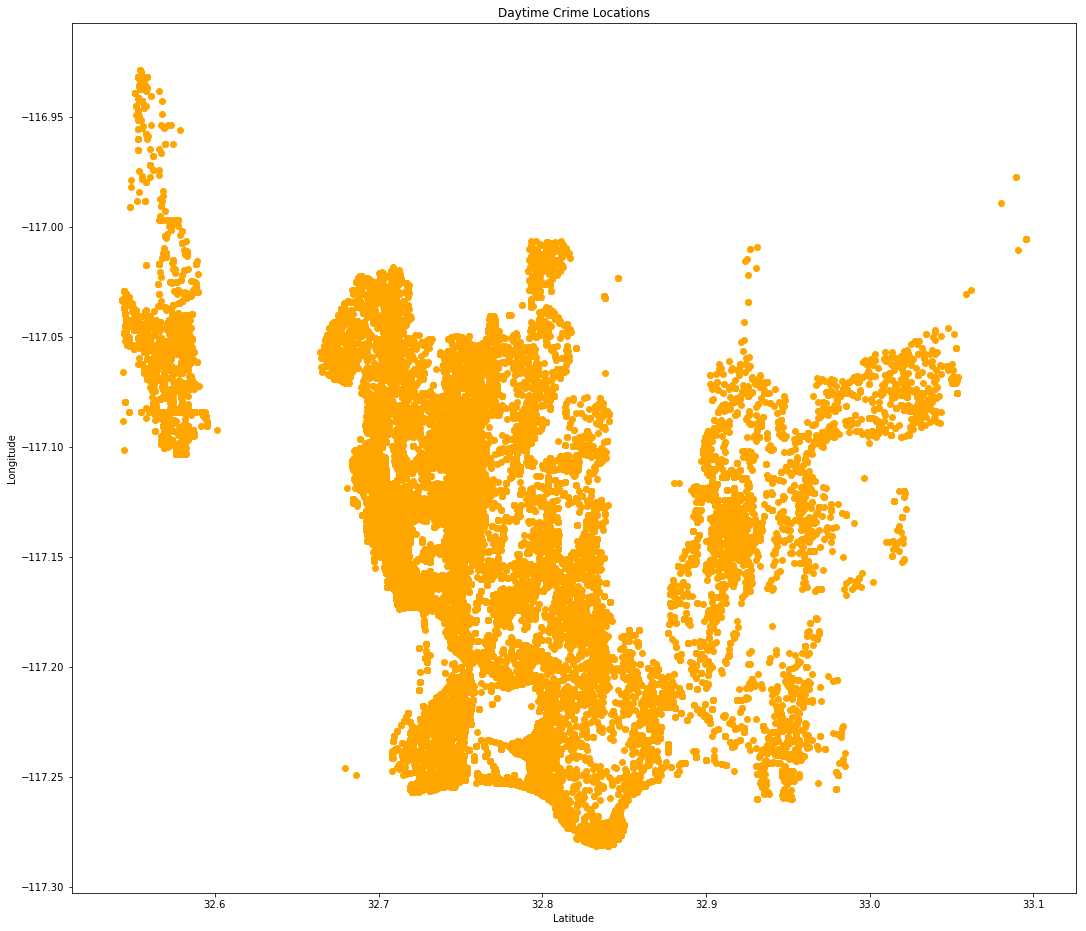

In [13]:
# Figure 2.1.4 Scatter plot of crimes during the daytime (longitude vs. latitude)
plt.figure(figsize=(18, 16))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Daytime Crime Locations')
fig4 = plt.scatter(df_crimes_day['lat'], df_crimes_day['lon'], color="orange")

#### Figure 2.1.4
This scatter plot (orange) displays the distribution crimes during the day in regards to the crime’s location (longitude/latitude).

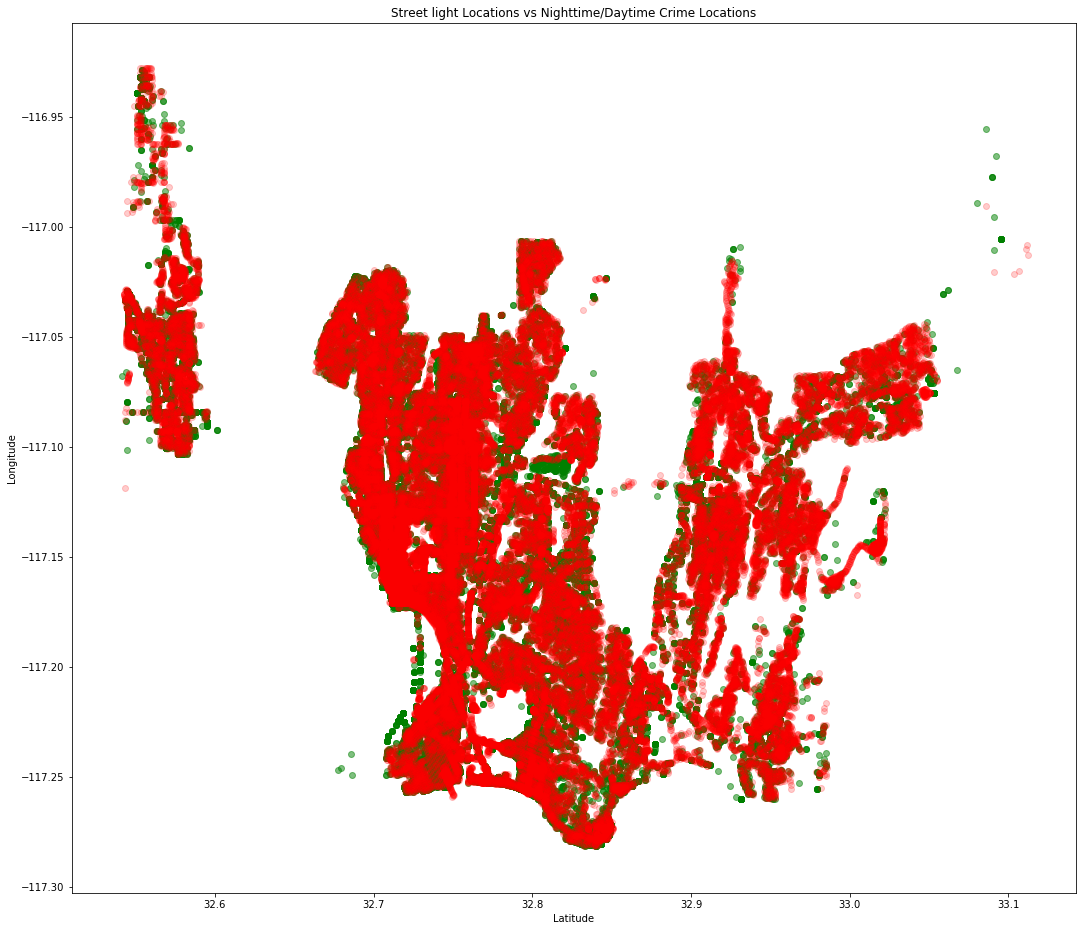

In [14]:
# Figure 2.1.5 Superimposed scatter plot of street light locations and crime locations
plt.figure(figsize=(18, 16))
plt.scatter(df_crimes['lat'], df_crimes['lon'], color="green", alpha="0.5")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Street light Locations vs Nighttime/Daytime Crime Locations')
fig5 = plt.scatter(df_lights['lat'], df_lights['lon'], color='red', alpha="0.2")


#### Figure 2.1.5
This is a superimposition of street light and crime locations. This is used to directly compare the street light locations to the crime locations. This creates a visualization of where location/distribution of street lights is correlated with crime.

This scatter plot superimposes street light (Figure 2.1.1) on crime at day and nighttime (Figure 2.1.2). There are many areas in which crime (green) overlaps with where street lights (red) are. However, at the coordinate areas  (33.1, 117.9-116.95 ), (32.81,117.10), and (32.73,117.20) crime occurred with no street lights present. 

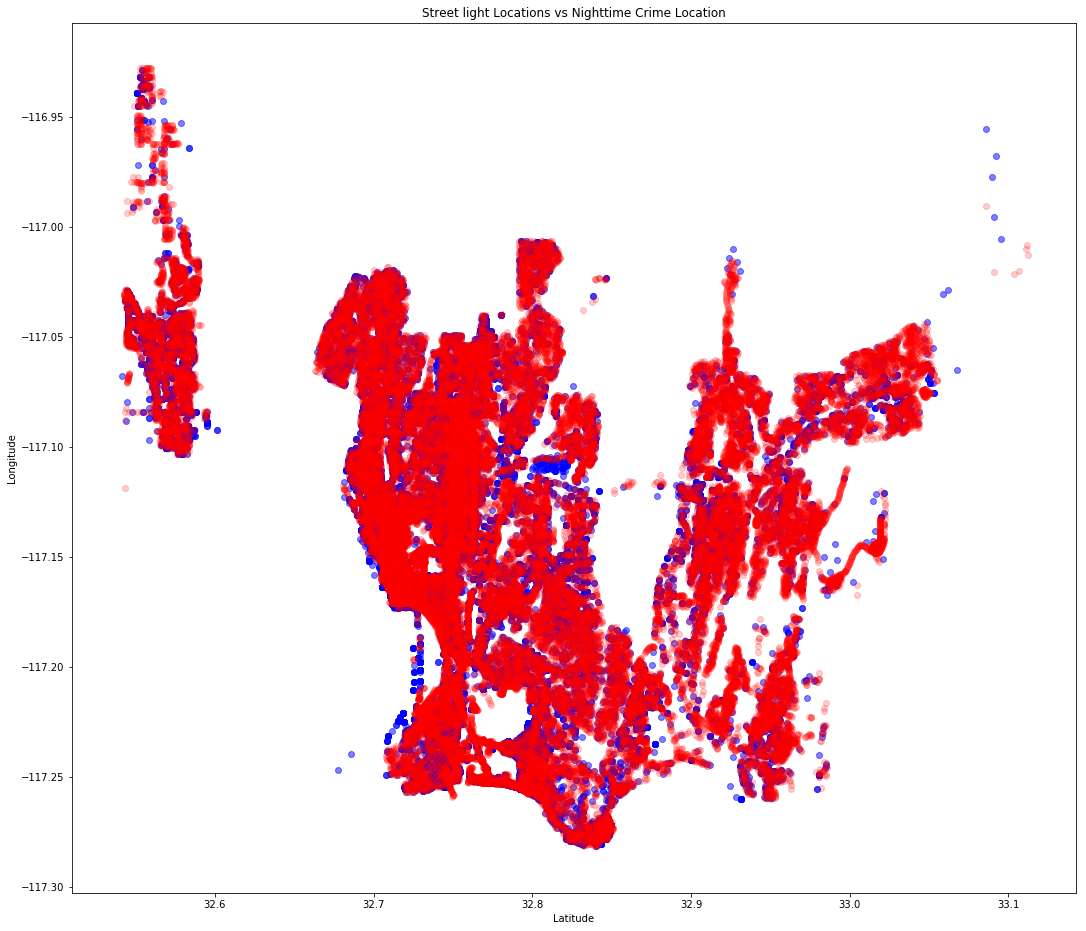

In [15]:
# Figure 2.1.6 Superimposed scatter plot of crimes at night on street lights
plt.figure(figsize=(18, 16))
plt.scatter(df_crimes_night['lat'], df_crimes_night['lon'], color="blue", alpha="0.5")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Street light Locations vs Nighttime Crime Location')
fig6 = plt.scatter(df_lights['lat'], df_lights['lon'], color='red', alpha="0.2")


#### Figure 2.1.6 
This scatter plot superimposes street light location (Figure 2.1.1, red) with crime location at night (Figure 2.1.3, blue). There are many areas in crime and street lights overlap. However, there are some areas where they do not overlap such as at the coordinates (33.1, 117.9-116.95 ), (32.81,117.10), and (32.73,117.20). These coordinates are areas where crime occurred at nighttime with no street lights present. 

This scatter plot shows that the distribution of nighttime crimes does not differ too much from the previous scatter plot that showed both day and nighttime crimes.


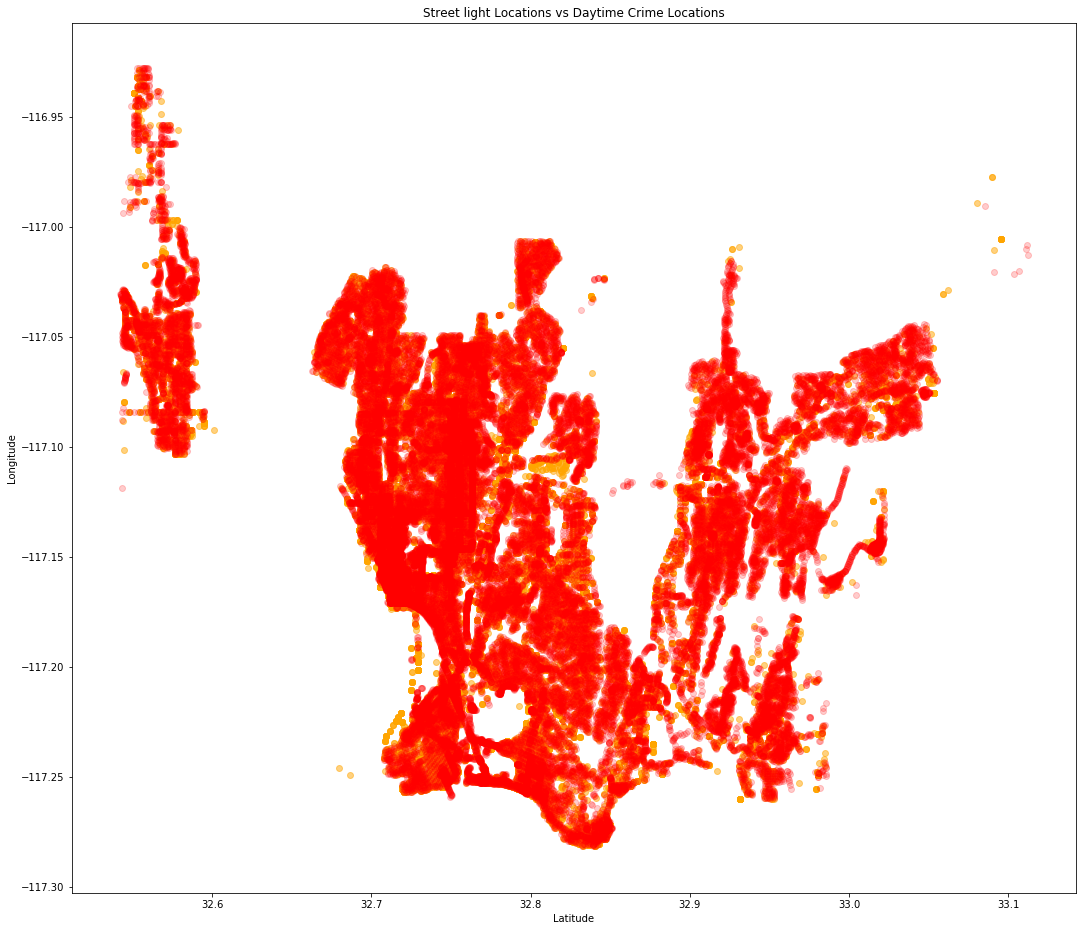

In [16]:
# Figure 2.1.7 Superimposed scatter plot of crimes during the day on street lights
plt.figure(figsize=(18, 16))
plt.scatter(df_crimes_day['lat'], df_crimes_day['lon'], color="orange", alpha="0.5")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Street light Locations vs Daytime Crime Locations')
fig7 = plt.scatter(df_lights['lat'], df_lights['lon'], color='red', alpha="0.2")



#### Figure 2.1.7
This scatter plot superimposes street light location (Figure 2.1.1, red) on crime location during the daytime (orange distribution). There are many areas in which crime during the day (orange) overlaps with where street lights are (Figure 2.1.4, orange). However, at the coordinate areas (33.1, 117.9-116.95 ), (32.81,117.10), and (32.73,117.20) are areas where crime occurred at daytime with no street lights present. 

This scatter plot shows that the distribution of daytime crimes does not differ too much from the previous 2 scatter plots that showed the distribution of both day and nighttime crimes as well as the scatter plot showing the distribution of nighttime crimes.

### 2.2 Bar Graph Visualizations
In further analysis of the data bar graphs are created to visualize how many street lights are in each neighborhood. Bar graphs are used for this because of the quick ability to differentiate between heights of the bars (# of street lights). Due to the ordering of most to least lights it is easy to see the distribution of lights per neighborhood.

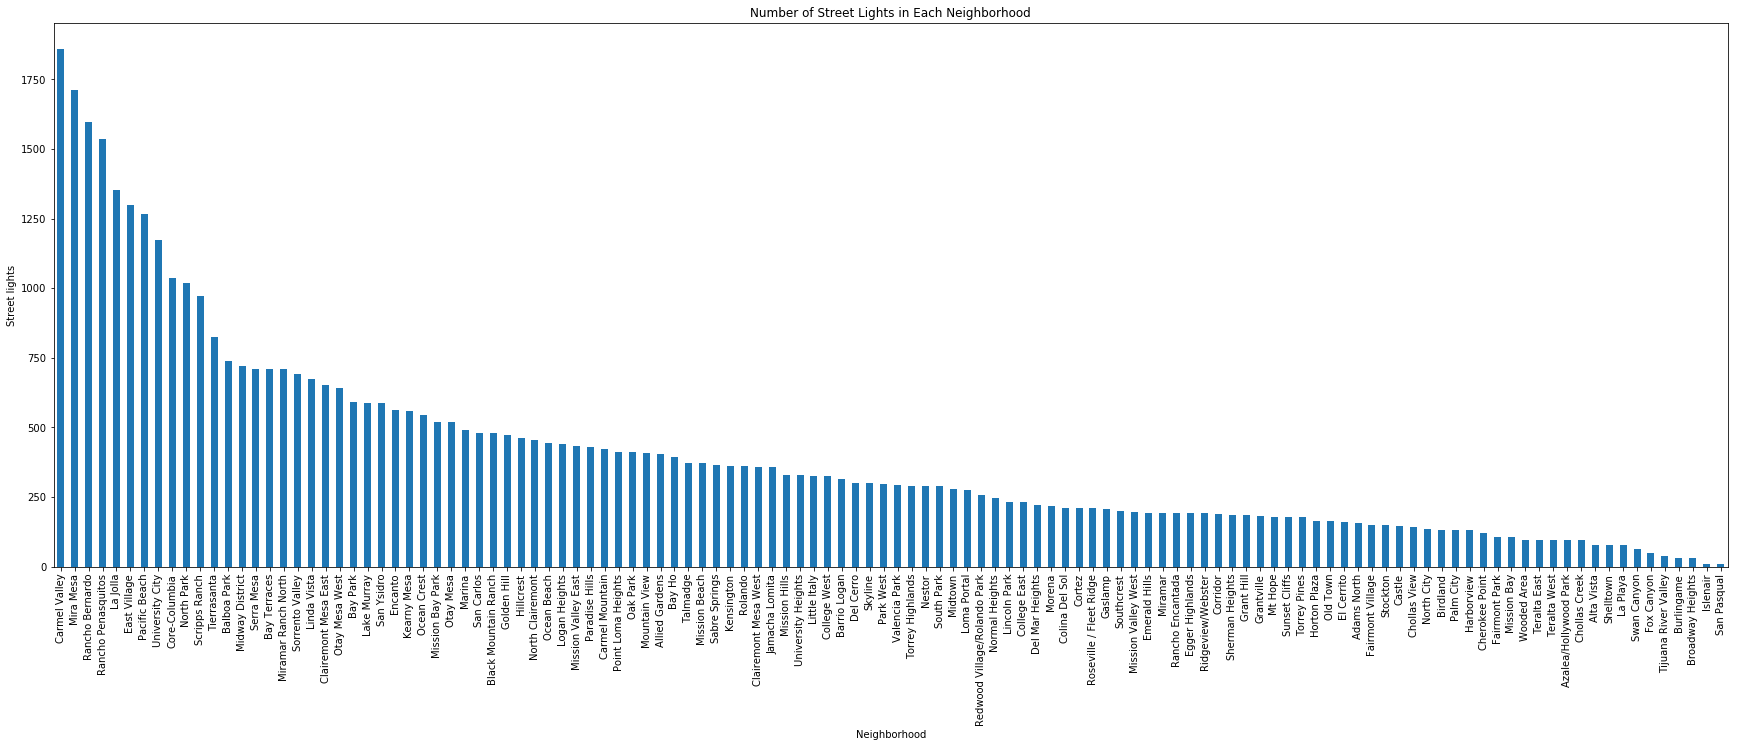

In [17]:
# Figure 2.2.1 Bar chart showing the number of street lights in each neighborhood
plt.figure(figsize=(30, 10))
lights = pd.value_counts(df_lights['neighborhood'].values, sort=True)
fig8 = lights.plot.bar(title='Number of Street Lights in Each Neighborhood')
fig8.set_xlabel('Neighborhood')
fig8.set_ylabel('Street lights')

fig8 = plt.gcf()

#### Figure 2.2.1
This bar graph shows the number of street lights (y-axis) per neighborhood (x-axis). It shows that there is a wide range of street lights per neighborhood, but as expected most neighborhoods seems to have a similar number with a few outliers.

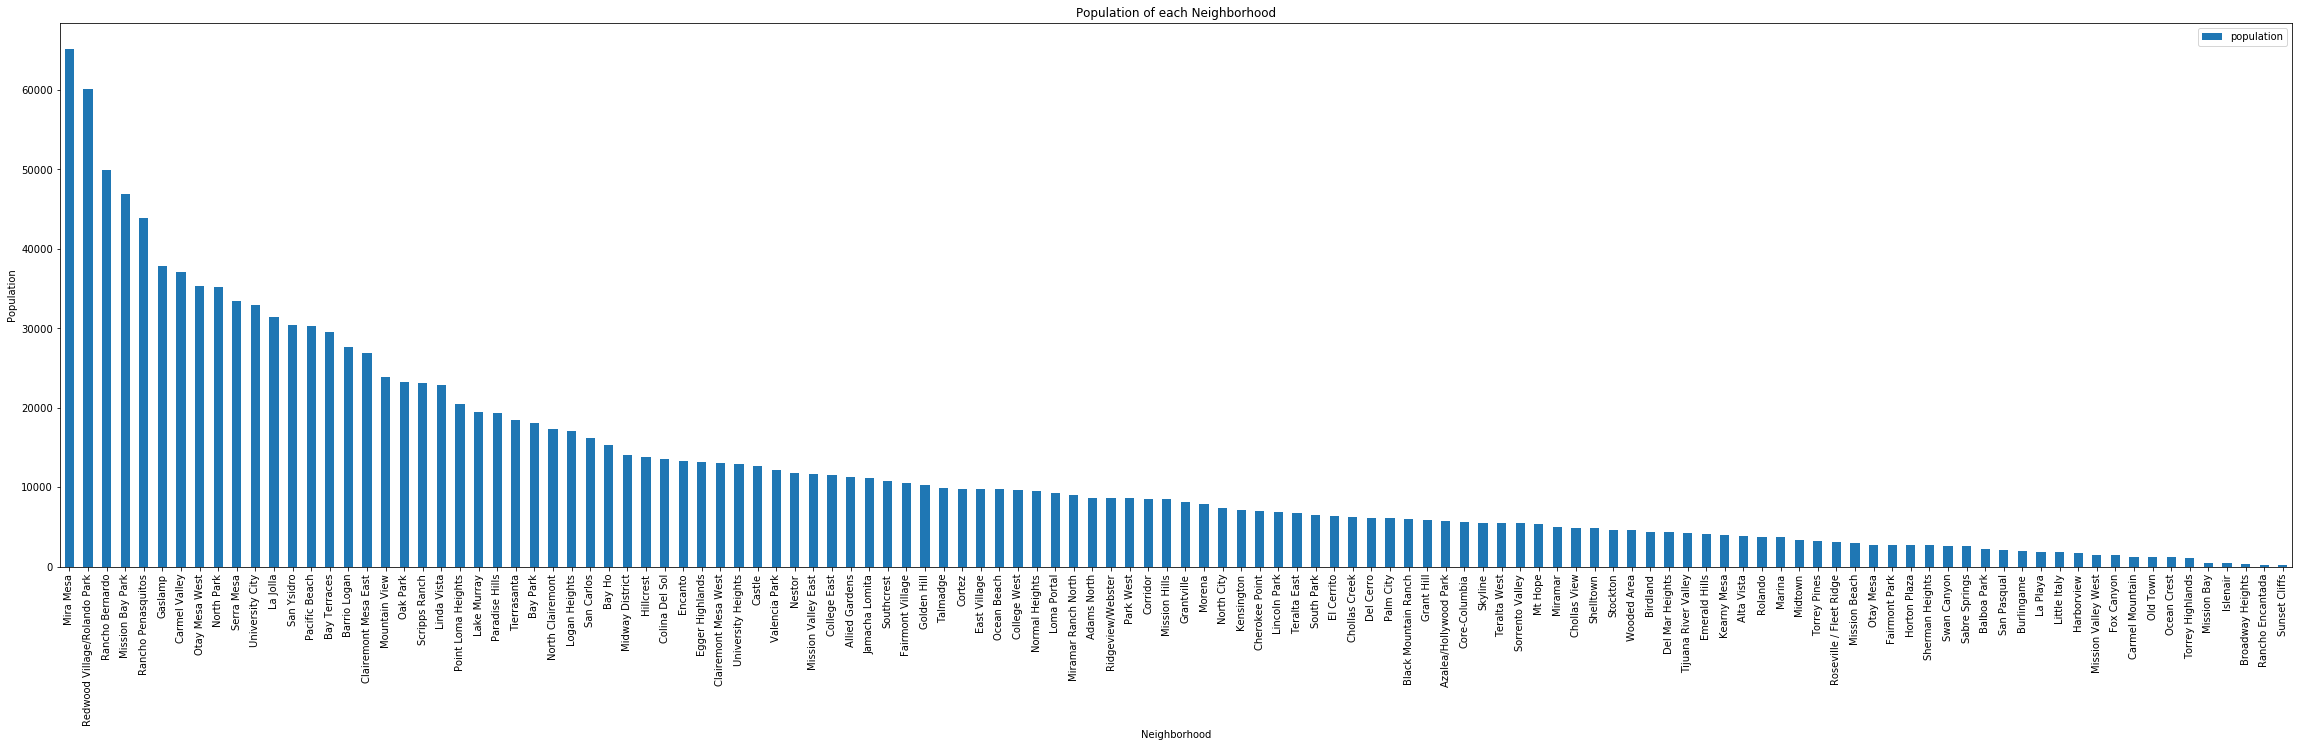

In [18]:
# Figure 2.2.2 Bar chart showing the population of each neighborhood
df_populations = df_populations.sort_values(by='population', ascending=False)
fig = df_populations.plot.bar(x='neighborhood', y=['population'],  title='Population of each Neighborhood', figsize=(40,10))
fig.set_xlabel('Neighborhood')
fig.set_ylabel('Population')
fig = plt.gcf()

#### Figure 2.2.2
This bar graph shows the population (y-axis) per neighborhood (x-axis). The purpose of this graph is to see how much population effects the number of street lights in a neighborhood.

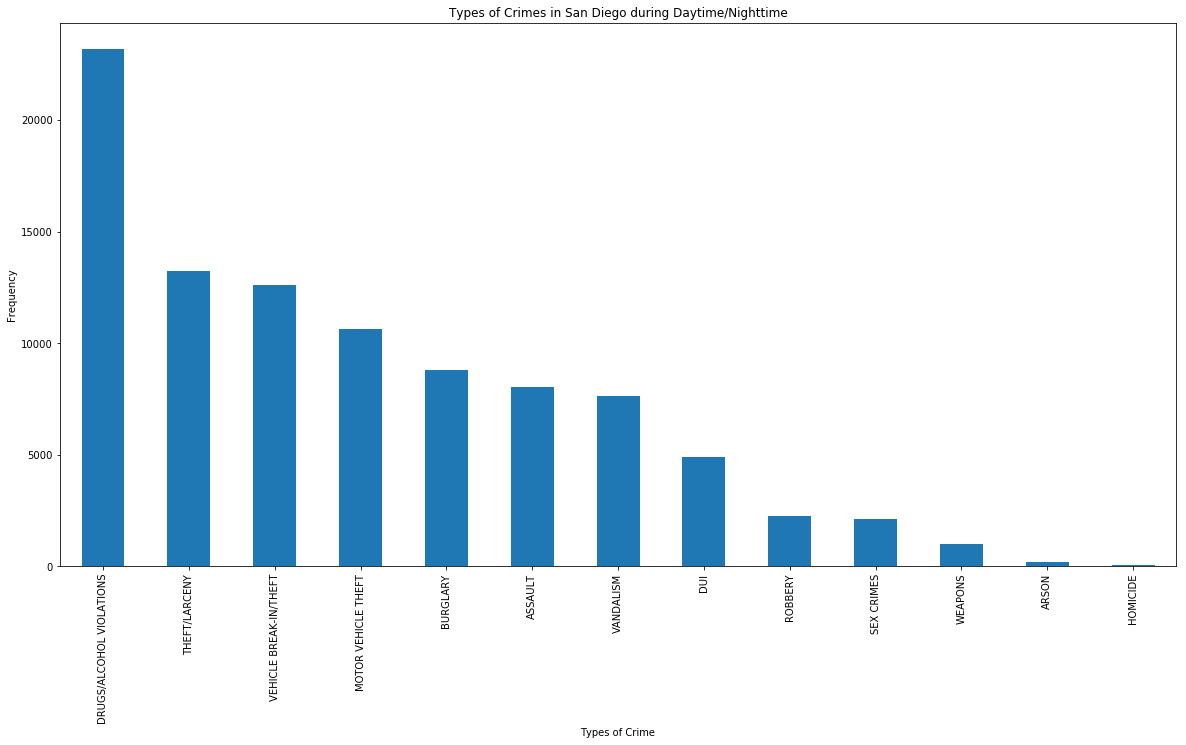

In [19]:
# Figure 2.2.3 bar chart showing the types of crimes during the day & night
plt.figure(figsize=(20, 10))
crimes = pd.value_counts(df_crimes['type'].values, sort=True)
fig9 = crimes.plot.bar(title='Types of Crimes in San Diego during Daytime/Nighttime')
fig9.set_xlabel('Types of Crime')
fig9.set_ylabel('Frequency')

fig9 = plt.gcf()

#### Figure 2.2.3
This bar graph shows the amount of crimes (y-axis) in each type of crime (x-axis). This bar graphs include both day and nighttime crimes.

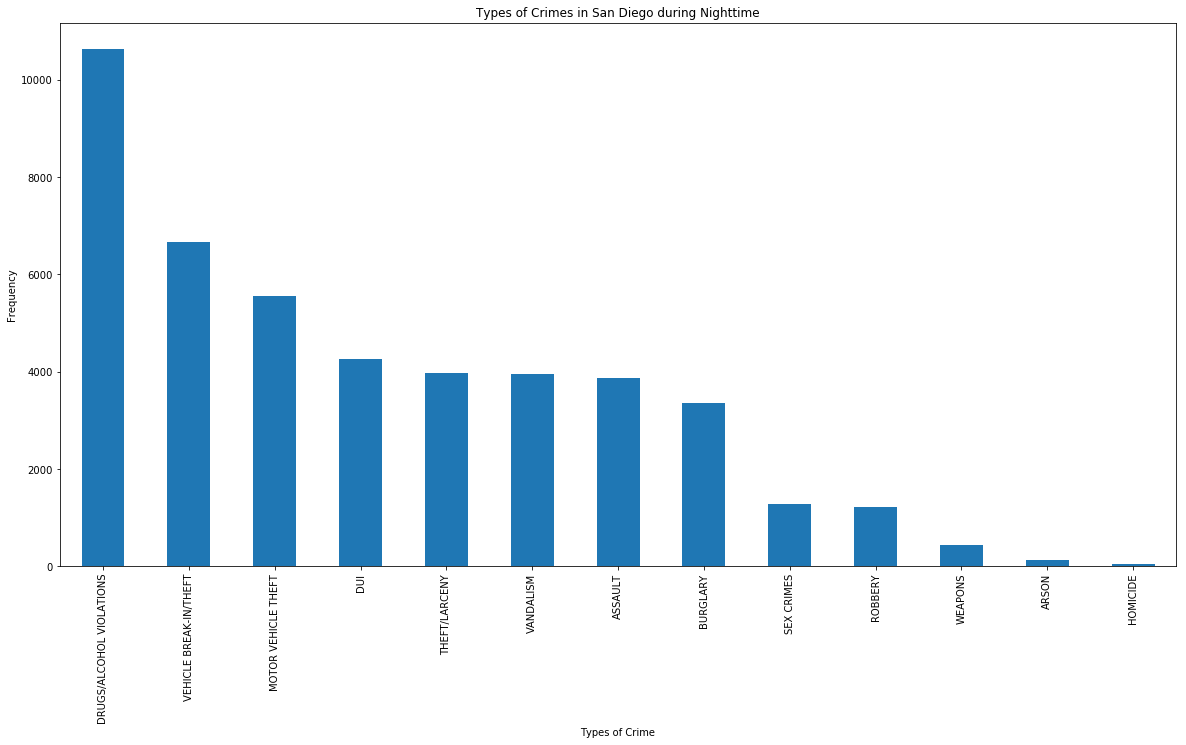

In [20]:
# Figure 2.2.4 Bar chart showing the types of crimes during night time
plt.figure(figsize=(20, 10))
crimes = pd.value_counts(df_crimes_night['type'].values, sort=True)
fig10 = crimes.plot.bar(title='Types of Crimes in San Diego during Nighttime')
fig10.set_xlabel('Types of Crime')
fig10.set_ylabel('Frequency')

fig10 = plt.gcf()

#### Figure 2.2.4
The bar graph breaks down the graph from Fig. 2.2.3 to only display the amount of crimes in the type of crimes during nighttime.

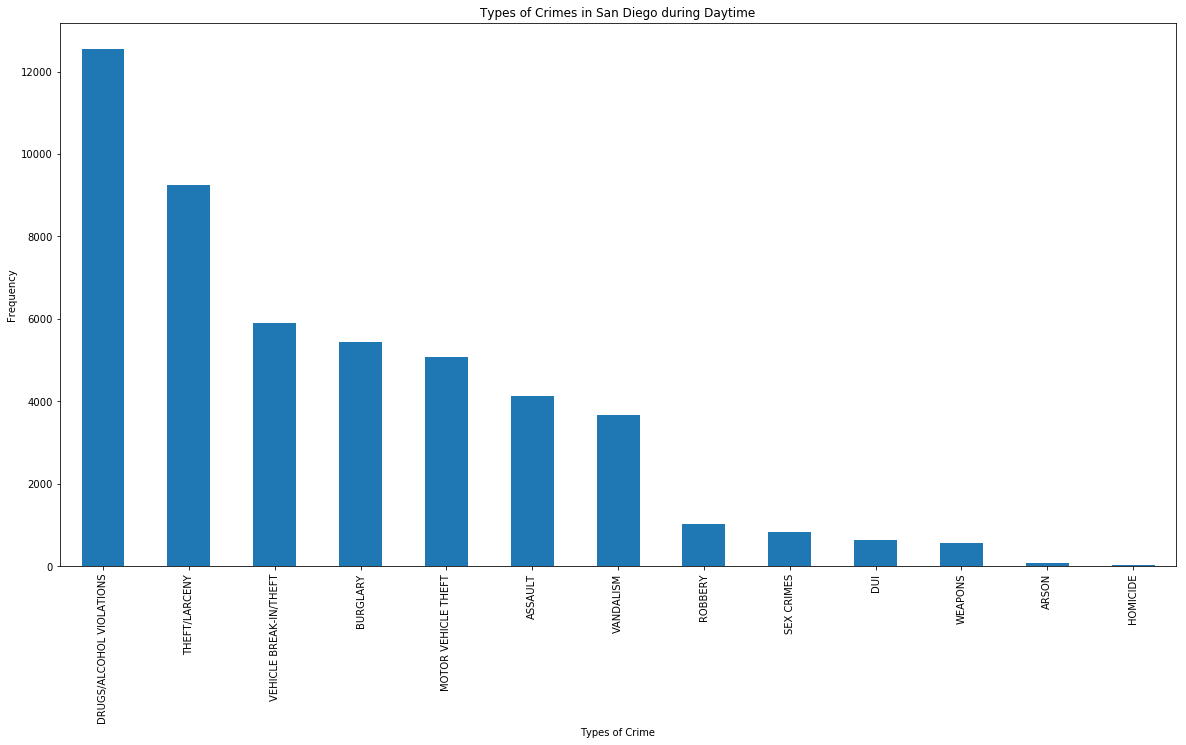

In [21]:
# Figure 2.2.5 Bar chart showing the types of crimes during day time
plt.figure(figsize=(20, 10))
crimes = pd.value_counts(df_crimes_day['type'].values, sort=True)
fig11 = crimes.plot.bar(title='Types of Crimes in San Diego during Daytime')
fig11.set_xlabel('Types of Crime')
fig11.set_ylabel('Frequency')

fig11 = plt.gcf()

#### Figure 2.2.4
The bar graph breaks down the graph from Fig. 2.2.3 to only display the amount of crimes in the type of crimes during  daytime.

In [22]:
# Dataframe of light counts 
df_lights_count = pd.DataFrame({'neighborhood': lights.index, 'lights': lights.values})

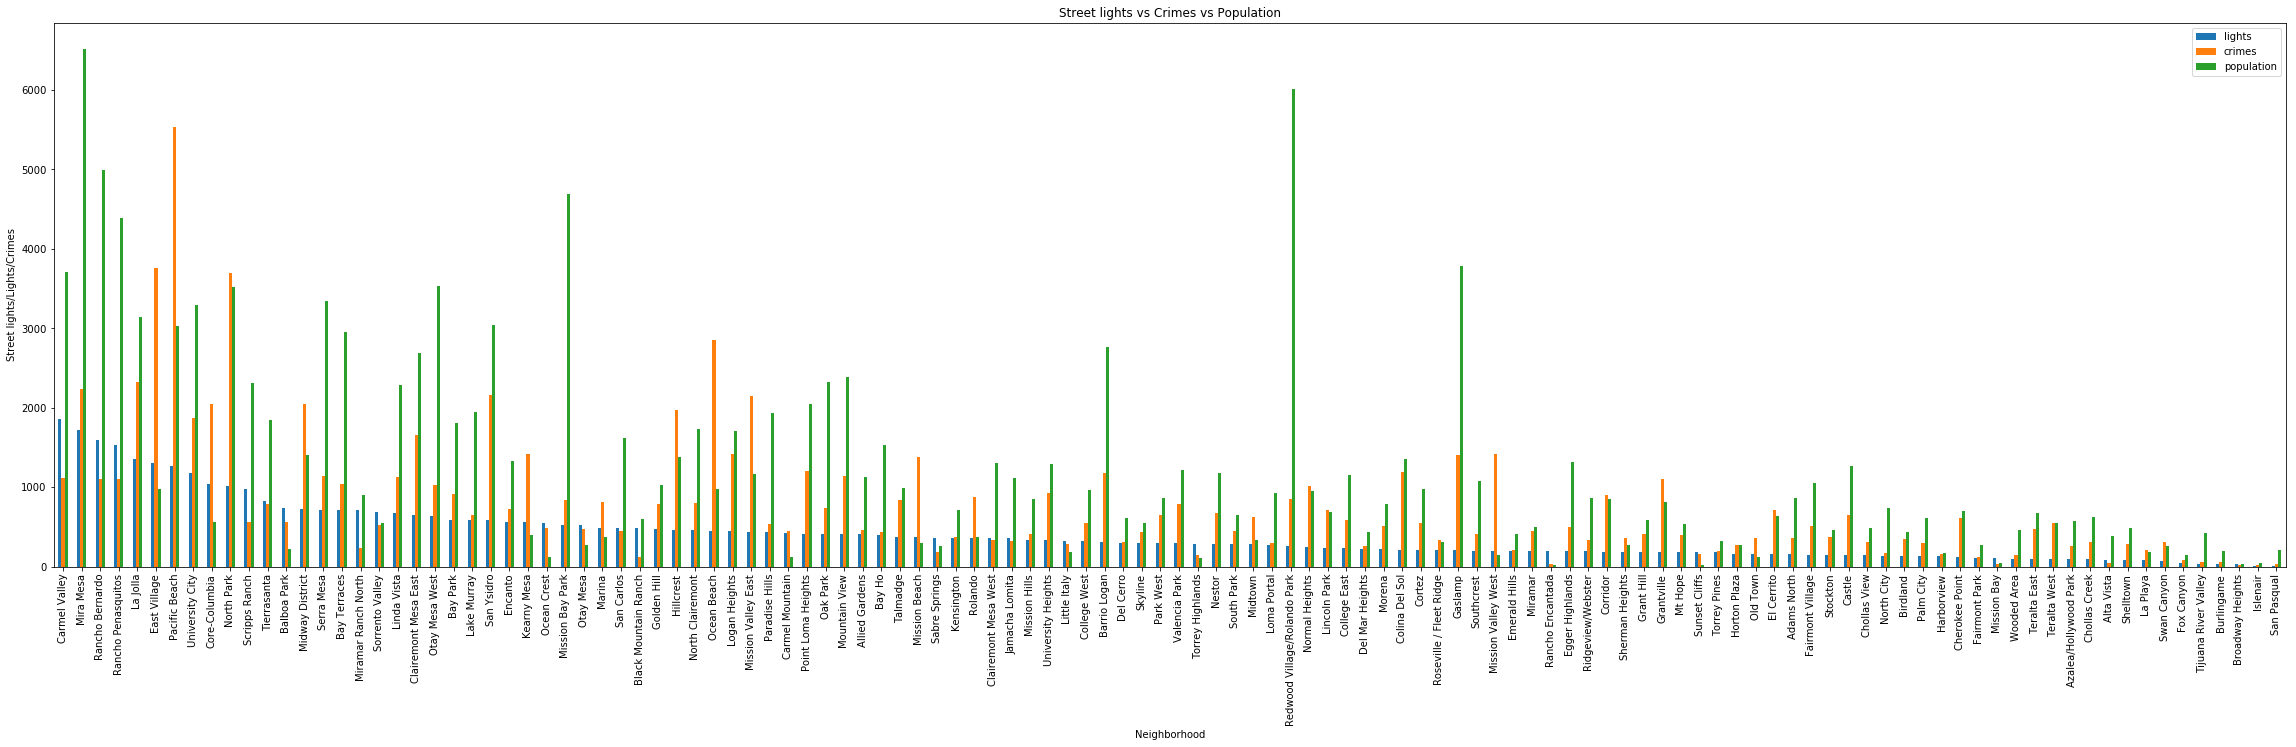

In [23]:
# Figure 2.2.5 Bar graph of # of crimes in each neighborhood compared with
# number of lights in each neighborhood

# Divide populations of neighborhoods by 10 so they are comparable
df_populations['population'] = df_populations['population']/10

# Number of crimes in each neighborhood
crimes = pd.value_counts(df_crimes['nbrhood'].values, sort=True)
 
# Dataframe of crime counts in each neighborhood
df_crimes_count = pd.DataFrame({'neighborhood': crimes.index, 'crimes': crimes.values})
 
# Result of merging light counts with crime counts
lights_crimes_num = pd.merge(df_lights_count, df_crimes_count, on='neighborhood')

# Result of merging lights_crimes_num with population
result1 = pd.merge(lights_crimes_num, df_populations, on='neighborhood')
 
fig = result1.plot.bar(x='neighborhood', y=['lights', 'crimes', 'population'],  title='Street lights vs Crimes vs Population', figsize=(40,10))
fig.set_xlabel('Neighborhood')
fig.set_ylabel('Street lights/Lights/Crimes')
fig = plt.gcf()


#### Figure 2.2.5
This bar graph merges the amount of crimes (both daytime and nighttime) in each neighborhood against the total number of street lights.

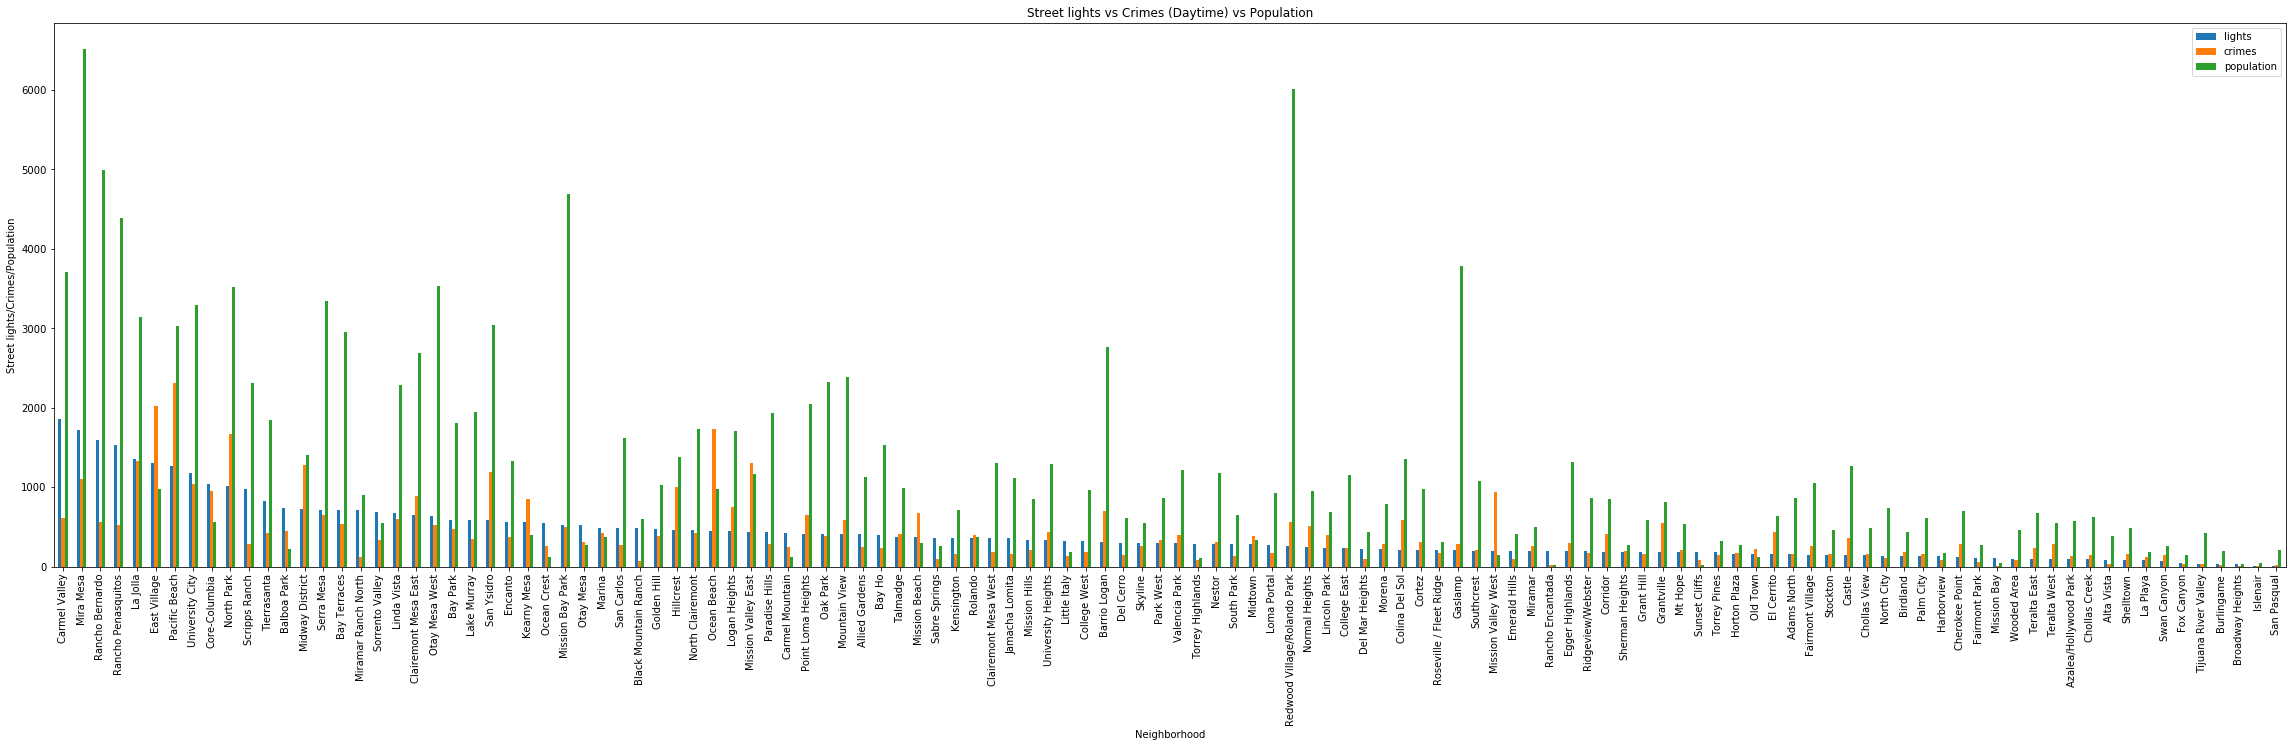

In [24]:
# Figure 2.2.6 Bar graph of # of crimes in each neighborhood during the day
# compared with number of lights in each neighborhood

# Number of crimes during the day in each neighborhood
crimes_day = pd.value_counts(df_crimes_day['nbrhood'].values, sort=True)
 
# Dataframe of crime counts in each neighborhood
df_crimes_day_count = pd.DataFrame({'neighborhood': crimes_day.index, 'crimes': crimes_day.values})
 
# Result of merging light counts with crime counts
lights_crimes_num = pd.merge(df_lights_count, df_crimes_day_count, on='neighborhood')

# Result of merging lights_crimes_num with population
result2 = pd.merge(lights_crimes_num, df_populations, on='neighborhood')
 
fig = result2.plot.bar(x='neighborhood', y=['lights', 'crimes', 'population'], title='Street lights vs Crimes (Daytime) vs Population', figsize=(40,10))
fig.set_xlabel('Neighborhood')
fig.set_ylabel('Street lights/Crimes/Population')
fig = plt.gcf()

#### Figure 2.2.6
This bar graph merges the amount of crimes in each neighborhood against the total number of street lights as seen in Fig. 2.2.5, however, this bar graph only attributes crimes that occurred during the daytime. 

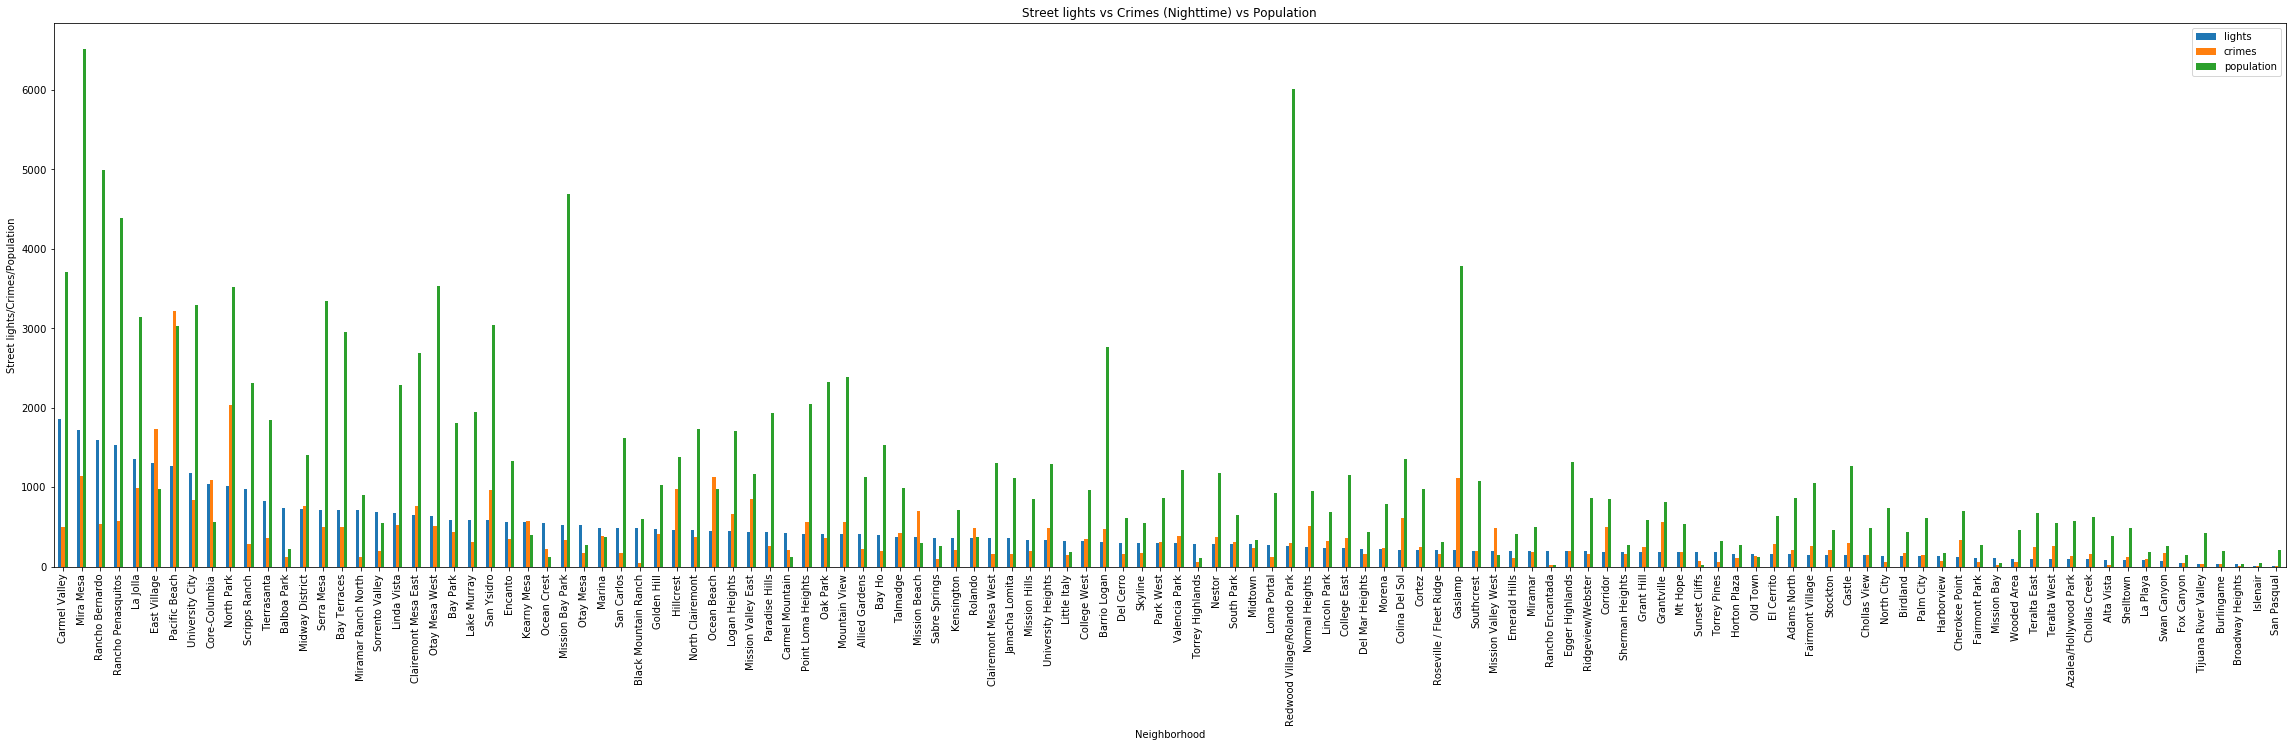

In [25]:
# Figure 2.2.7 Bar graph of # of crimes in each neighborhood during the 
# night compared with number of lights in each neighborhood

# number of crimes during the night in each neighborhood
crimes_night = pd.value_counts(df_crimes_night['nbrhood'].values, sort=True)
 
# dataframe of crime counts in each neighborhood
df_crimes_night_count = pd.DataFrame({'neighborhood': crimes_night.index, 'crimes': crimes_night.values})
 
# result of merging light counts with crime counts
lights_crimes_num = pd.merge(df_lights_count, df_crimes_night_count, on='neighborhood')

# result of merging lights_crimes_num with population
result3 = pd.merge(lights_crimes_num, df_populations, on='neighborhood')
 
fig = result3.plot.bar(x='neighborhood', y=['lights', 'crimes', 'population'], title='Street lights vs Crimes (Nighttime) vs Population', figsize=(40,10))
fig.set_xlabel('Neighborhood')
fig.set_ylabel('Street lights/Crimes/Population')
fig = plt.gcf()

#### Figure 2.2.7
This bar graph merges the amount of crimes in each neighborhood against the total number of street lights as seen in Fig. 2.2.5, however, this bar graph only attributes crimes that occurred during the nighttime. 

### 2.3 Histogram Visualizations
Histograms are used to plot frequencies of crimes against distance from lights.

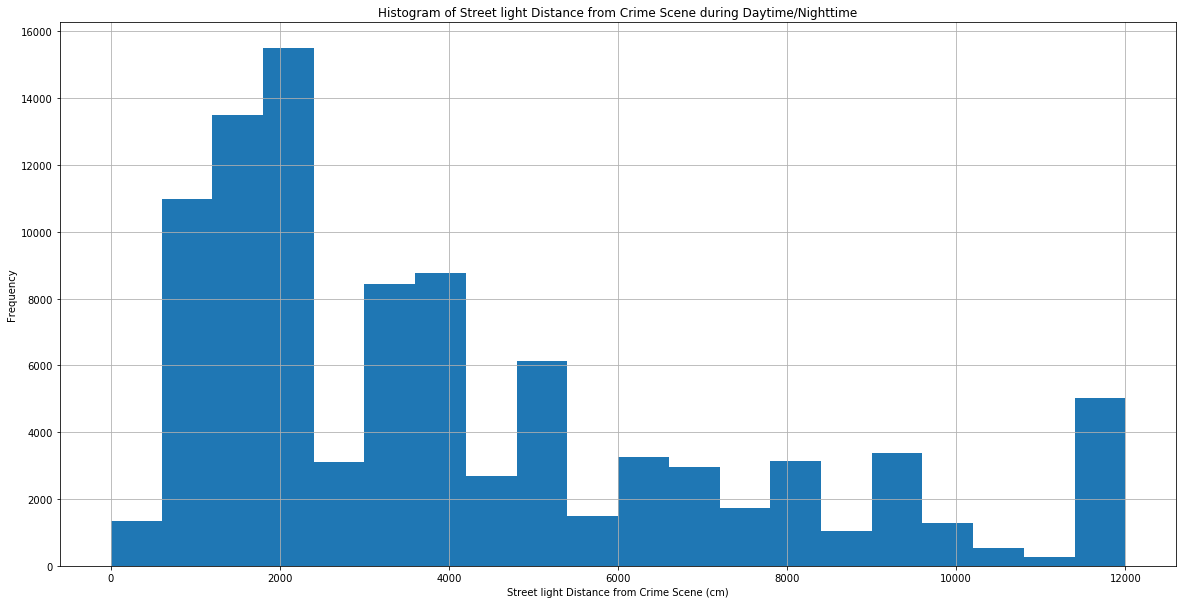

In [26]:
# Figure 2.3.1 Histogram of street light distance from crime scene during daytime/nighttime
plt.figure(figsize=(20, 10))
fig12 = df_crimes['lampdist'].hist(bins=20)
fig12.set_title('Histogram of Street light Distance from Crime Scene during Daytime/Nighttime')
fig12.set_xlabel('Street light Distance from Crime Scene (cm)')
fig12.set_ylabel('Frequency')

fig12 = plt.gcf()

#### Figure 2.3.1
 
The histogram above compares the street light distance(cm), against the # of crimes during both day and night time. From this histogram, we can see that there is greater number of crimes distributed around 20 meters. Also, this histogram provides evidence that more crimes occur when street lights are closer, due to the left skew seen in the histogram above. This could possibly be due to the fact that street lights are going to be closer to houses, apartments, shopping areas, dining, etc. which is why there would be more crimes closer to the street lights. 

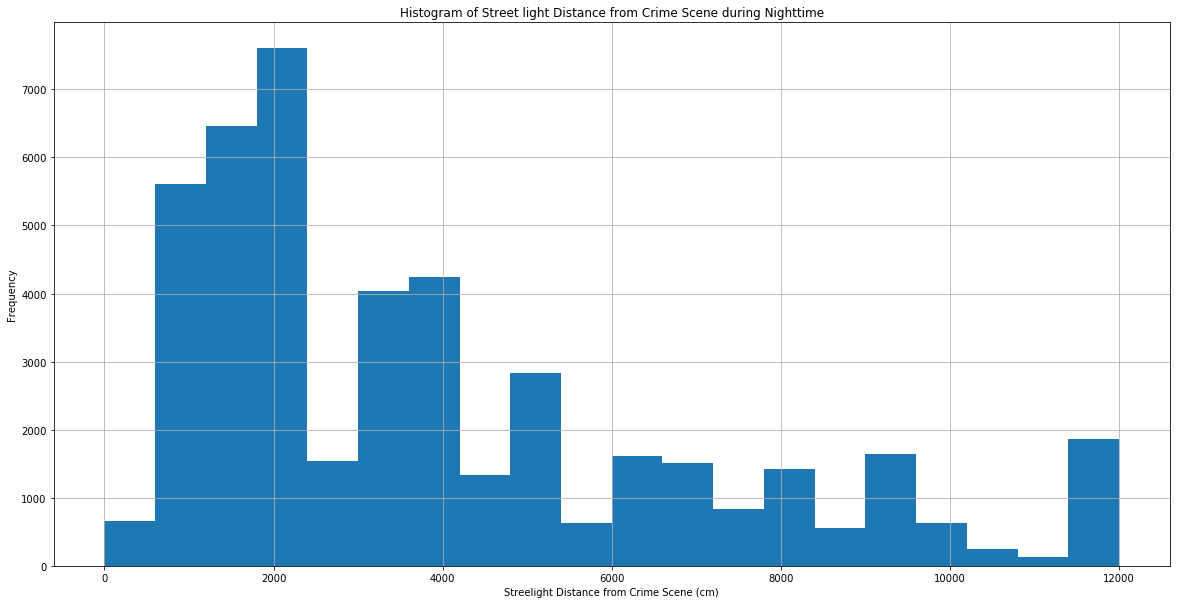

In [27]:
# Figure 2.3.2 Histogram of street light distance from crime scene during nighttime
plt.figure(figsize=(20, 10))
fig13 = df_crimes_night['lampdist'].hist(bins=20)
fig13.set_title('Histogram of Street light Distance from Crime Scene during Nighttime')
fig13.set_xlabel('Streelight Distance from Crime Scene (cm)')
fig13.set_ylabel('Frequency')

f2 = plt.gcf()

#### Figure 2.3.2
The histogram above compares the street light distance(cm), against the amount of crimes that occur during nighttime. From this histogram, we can see that there is greater number of crimes distributed around 20 meters and there is evidence  that more crimes occur when street lights are closer  due to the left skew seen in the histogram above. 

This is histogram has very similar distribution to the histogram above with both day and nighttime crimes. 

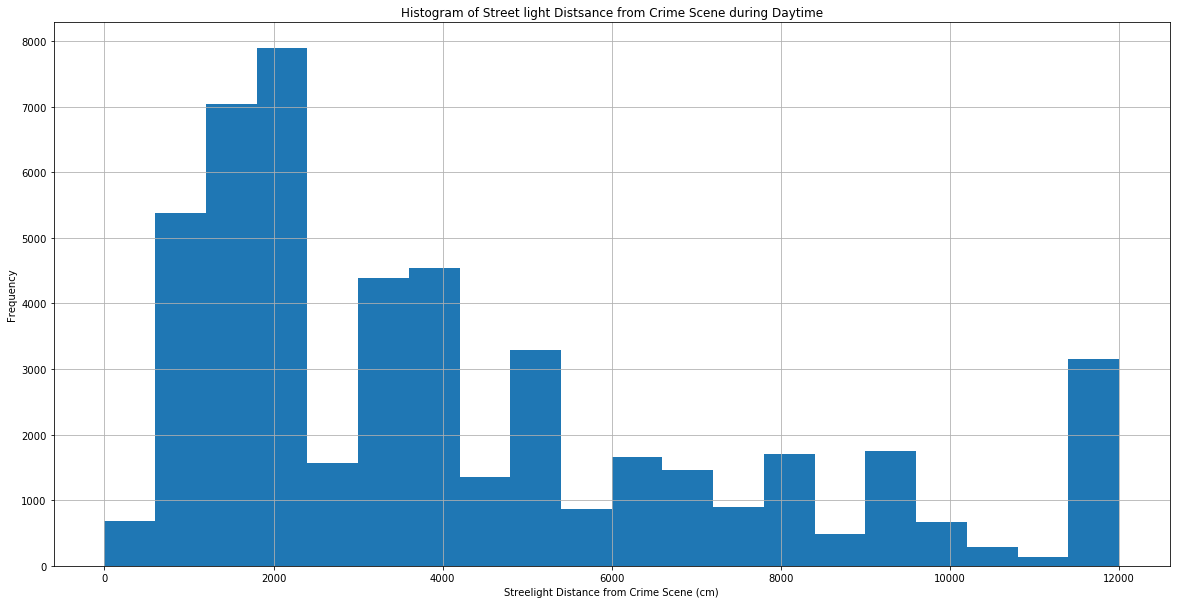

In [28]:
# Figure 2.3.3 histogram of street light distance from crime scene during the daytime
plt.figure(figsize=(20, 10))
fig14 = df_crimes_day['lampdist'].hist(bins=20)
fig14.set_title('Histogram of Street light Distsance from Crime Scene during Daytime')
fig14.set_xlabel('Streelight Distance from Crime Scene (cm)')
fig14.set_ylabel('Frequency')

fig14 = plt.gcf()

#### Figure 2.3.3 
 
The histogram above compares the street light distance(cm), against the amount of crimes that occur during daytime. From this histogram, we can see that there is greater number of crimes distributed around 20 meters and there is evidence  that more crimes occur when street lights are closer  due to the left skew seen in the histogram above. We can also see that around 120 meters there is a spike of more than 1000 crimes than compared to the nighttime histogram. 

 This is histogram has very similar distribution to the histogram above with both day and nighttime crimes and the histogram for only daytime crimes.


## 3. Exploring the Data
Exploring the data is a vital to getting a better understanding of the data. Data visualization is not enough on its own and this section helps break down the important information that is needed to test our hypothesis.

### 3.1 Neighborhood Exploration
The purpose of this data is to look at the number of neighborhoods and their populations, as well as later seeing if there is a correlation between population and number of street lights.

In [29]:
# Different Communities in San Diego
n_arr = df_lights['neighborhood'].unique()
n_num = len(n_arr)
print ("Number of Neighborhoods: " + str(n_num))

Number of Neighborhoods: 121


In [30]:
# Most popular neighborhood and population
most_pop = df_populations['population'].values[0] * 10
print ("Most popular neighborhood: \t" + str(df_populations['neighborhood'].values[0]) + "\t" + str(most_pop))

# Least popular neighborhood
lowest_pop = df_populations['population'].values[len(df_populations) - 1] * 10
print ("Least popular neighborhood:\t" + str(df_populations['neighborhood'].values[len(df_populations) - 1])+ "\t" + str(lowest_pop))

# Difference between the least and most popular neighborhood
print ("\nDifference:\t" + str(most_pop - lowest_pop))

Most popular neighborhood: 	Mira Mesa	65179.0
Least popular neighborhood:	Sunset Cliffs	159.0

Difference:	65020.0


### 3.2 Crime Exploration
Here we are going through the different types of crimes as well as neighborhood with the highest and lowest crimes rates.

In [31]:
# Different types of crimes in San Diego
c_arr = df_crimes['type'].unique()
c_num = len(c_arr)
print ("Types of Crimes: " + str(c_num) + "\n")

# Print out crimes
for crimes in c_arr:
    print(crimes)

Types of Crimes: 13

WEAPONS
ASSAULT
DRUGS/ALCOHOL VIOLATIONS
ROBBERY
SEX CRIMES
BURGLARY
VEHICLE BREAK-IN/THEFT
ARSON
MOTOR VEHICLE THEFT
VANDALISM
DUI
THEFT/LARCENY
HOMICIDE


In [32]:
# Total number of crimes
print("Number of Crimes: \n")
total_crimes_num = len(df_crimes)
print ("Total:\t\t" + str(total_crimes_num))

# Number of daytime crimes
day_crimes_num = len(df_crimes_day)
print ("Daytime:\t" + str(day_crimes_num))

# Number of nighttime crimes
night_crimes_num = len(df_crimes_night)
print ("Nighttime:\t" + str(night_crimes_num))

# Difference between nighttime crimes and daytime crimes
print ("Difference:\t" + str(day_crimes_num - night_crimes_num))

Number of Crimes: 

Total:		94588
Daytime:	49185
Nighttime:	45403
Difference:	3782


In [33]:
# Top daytime/nighttime crime
print( "Most Frequent Type of Crime:\n")
crime_type = pd.value_counts(df_crimes['type'].values, sort=True)
print ("Overall:\t" + str(crime_type.index[0]))

# Top daytime crime
crime_type = pd.value_counts(df_crimes_day['type'].values, sort=True)
print ("Daytime:\t" + str(crime_type.index[0]))

# Top nighttime crime
crime_type = pd.value_counts(df_crimes_night['type'].values, sort=True)
print ("Nighttime:\t" + str(crime_type.index[0]))



Most Frequent Type of Crime:

Overall:	DRUGS/ALCOHOL VIOLATIONS
Daytime:	DRUGS/ALCOHOL VIOLATIONS
Nighttime:	DRUGS/ALCOHOL VIOLATIONS


In [34]:
# Neighborhood with the most crimes during daytime and nighttime
print ("Neighborhood with the MOST crimes: \n");
nbr_crimes = pd.value_counts(df_crimes['nbrhood'].values, sort=True)
print ("Overall:\t" + nbr_crimes.index[0])

# Neighborhood with the most crimes during the daytime
nbr_crimes_day = pd.value_counts(df_crimes_day['nbrhood'].values, sort=True)
print ("Daytime:\t" + nbr_crimes_day.index[0])

# Neighborhood with the most crimes during the nighttime
nbr_crimes_night = pd.value_counts(df_crimes_night['nbrhood'].values, sort=True)
print ("Nighttime:\t" + nbr_crimes_night.index[0])

Neighborhood with the MOST crimes: 

Overall:	Pacific Beach
Daytime:	Pacific Beach
Nighttime:	Pacific Beach


In [35]:
# Neighborhood with the least crimes (nighttime & daytime)
print ("Neighborhood with the LEAST crimes: \n");
nbr_crimes = pd.value_counts(df_crimes['nbrhood'].values, sort=True)
print ("Overall:\t" + nbr_crimes.index[len(nbr_crimes) - 1])

# Neighborhood with the least crimes (daytime)
nbr_crimes_day = pd.value_counts(df_crimes_day['nbrhood'].values, sort=True)
print ("Daytime:\t" + nbr_crimes_day.index[len(nbr_crimes_day) - 1])

# Neighborhood with the least crimes (nighttime)
nbr_crimes_night = pd.value_counts(df_crimes_night['nbrhood'].values, sort=True)
print ("Nighttime:\t" + nbr_crimes_night.index[len(nbr_crimes_night) - 1])

Neighborhood with the LEAST crimes: 

Overall:	Islenair
Daytime:	Mission Bay
Nighttime:	San Pasqual


### 3.3 Street Light Exploration
This data tells us which neighborhoods have the most and least streetlights

In [36]:
# Neighborhood with the most street lights
max_lights = lights.max()
max_lights_n = lights.index[0]

# Neighborhood with the least street lights
min_lights = lights.min()
min_lights_n = lights.index[len(lights) - 1]


print("Type\t\t\tNeighborhood\t# of Lights\n")
print ("Most Street lights:\t" + str(max_lights_n) + "\t" + str(max_lights))
print ("Least Street lights:\t" + str(min_lights_n) + "\t" + str(min_lights))

Type			Neighborhood	# of Lights

Most Street lights:	Carmel Valley	1860
Least Street lights:	San Pasqual	8


In [37]:

print ("# Street lights/Neighborhood:\n")
# Range of number of street lights (max_lights_n - min_lights_n)
range_lights = max_lights - min_lights
print ("Range:\t\t" + str(range_lights))

# Average number of street lights in a neighborhood
print ("Average:\t" + str(math.ceil(lights.sum()/(len(lights)))))

# Street lights/Neighborhood:

Range:		1852
Average:	401


### 3.4 Street Light w/ Crime Exploration
This data merges the data from sections 3.2 and 3.3 to see how far crimes occur from nearest street light

In [38]:
print ("Average Distance of Street lights from a Crime Scene: \n")

# Average distance of street lights from a crime scene
print ("Overall:\t" + str(math.ceil(df_crimes['lampdist'].sum()/len(df_crimes['lampdist']))))

# Average distance of street lights from a crime scene during the day
print ("Daytime:\t" + str(math.ceil(df_crimes_day['lampdist'].sum()/len(df_crimes_day['lampdist']))))

# Average distance of street lights from a crime scene during the night
print ("Nighttime:\t" + str(math.ceil(df_crimes_night['lampdist'].sum()/len(df_crimes_night['lampdist']))))



Average Distance of Street lights from a Crime Scene: 

Overall:	4078
Daytime:	4192
Nighttime:	3954


## Part 4: Data Analysis
We use a t-test to compare the distributions of crime scene distance from street lights during the day and at night. The t-test compares the means of these distributions and determines if there is a significant difference between the two. If the resulting p-value is less than 0.05, it follows that there is a significant difference between crime scene distances from street lights during the daytime and nighttime.

---

### 4.1 T-test to Compare Crime Distributions for Day and Night
Comparing the distribution of crimes during the day and night is a way to help us understand whether the street lights have a greater effect during the night than during the day or if the lights do not really affect daytime v. nighttime crimes but instead simply have an overall effect.

In [39]:
# t-test to compare the two crime distributions during the daytime and nighttime
t_test = ttest_ind(df_crimes_night['lampdist'], df_crimes_day['lampdist'], axis=0, equal_var=True)
t = t_test[0]
p = t_test[1]

In [40]:
# Check if the p-value is significant
print("The difference between crime scene distances from street lights in nighttime v. daytime is:\n")
if p < 0.05:
    print('Significant!')
else:
    print('Not significant.')


The difference between crime scene distances from street lights in nighttime v. daytime is:

Significant!


This result may be due to street lights having different effects on the occurrence of crime, since street lights are more noticeable and used more commonly at night. Thus, creating a difference in the average distance of crime from stoplights between day and night. 

### 4.2 The Distribution of Street Light Distance from Crimes for Day and Night
The reason we check the distribution of lamp distance from crimes is to see if typically crimes occur further away from streetlights.

In [41]:
import scipy.stats as stats
from scipy.stats import normaltest
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from sklearn.decomposition import PCA

In [42]:
# Lamp distance for crimes during the day and night
h_night = df_crimes_night['lampdist'].values
h_day = df_crimes_day['lampdist'].values

# Check if normally distributed
st_night, p_night = normaltest(h_night)
st_day, p_day = normaltest(h_day)

In [43]:
alpha = 0.5

# Lamp distance for crimes at night
print("Lamp distances for crimes at night are: ")
if p_night < alpha: 
    print ("NOT Normally Distributed!")
else:
    print ("Normally Distributed!")

    
# Lamp distance for crimes during the day
print("\nLamp distances for crimes during the day are: ")
if p_day < alpha: 
    print ("NOT Normally Distributed!")

else:
    print ("Normally Distributed!")


Lamp distances for crimes at night are: 
NOT Normally Distributed!

Lamp distances for crimes during the day are: 
NOT Normally Distributed!


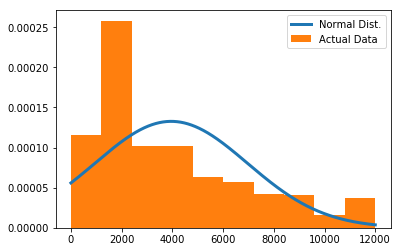

In [44]:
# Bar graph distribution of lamp distance from crimes at night 
xs = np.arange(h_night.min(), h_night.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_night), np.std(h_night))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(h_night, normed=True, label='Actual Data');
plt.legend();

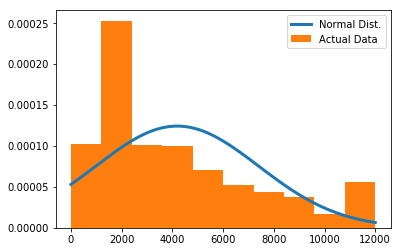

In [45]:
# Bar graph distribution of lamp distance from crimes during the day
xs = np.arange(h_day.min(), h_day.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_day), np.std(h_day))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(h_day, normed=True, label='Actual Data');
plt.legend();

This distribution may show that a larger number of crimes occur quite close to street lights, because street lights are often a sign of civilization (stores, homes, schools)--places where people may often frequent. 
 
The data is not normally distributed due to most crimes occurring at short distances from street light which provides support to our hypothesis. Less crimes were found at larger distances from streetlamps.

## 5. Discussion and Conclusion
---

### 5.1 Data Visualization Discussion:
Our scatterplots of location data allowed us to visualize the distribution of the locations of crimes and streetlights using latitude and longitude. By superimposing the scatterplot of streetlight locations (Figure 2.1.1)  onto scatterplots of the locations of crime scenes in total, during nighttime, and during daytime (Figures 2.1.2, 2.1.3, and 2.1.4 respectively), we noticed a vast majority of crimes occurred within the vicinity of streetlights (Figures 2.1.5, 2.1.6, 2.1.7), regardless if they occurred during the day or at night. Although this does not provide profound evidence in direct support of our hypothesis, we suspected this might be explained by the assumption that streetlights are often a sign of civilization, as streetlights serve to illuminate areas where people are likely to frequent. With a higher population present,  it's likely that the incidence of crime increases as well. This appears to be supported further in the histogram (Figure 2.3.3) we created to compare the street light distance and number of crimes, with the largest number of crimes placed around 20 meters from the nearest streetlights. The positive skew of our data in this visualization represents the tendency for more crime to occur closer to streetlights, and decreasing significantly as distance increases.


### 5.2 Exploring the Data Discussion:
 
For further insight, we created meaningful variables to make clear distinctions about our data. We were able to count instances such as the number of criminal offenses throughout the day as well as the difference between night and day,the number of unique crimes, and the number of streetlights.  Averages were also found for the number of streetlights in a neighborhood, and the distance between a streetlight and a crime scene. Particularly when looking at the difference in instances of crime between daytime and nighttime, we noticed the difference seemed quite minuscule compared to what we expected. Likewise, when comparing  average distances of streetlights from a crime scene overall, in nighttime, and daytime, values were seeming to differ only slightly; however, as we will later discuss, it proved quite significant. Additionally, we were able to determine maxima and minima to showcase neighborhoods with the most/least streetlights,  neighborhoods with the most/least crime during different times of the day, and the most/least committed crime. In creating these variables, we allowed ourselves to make more holistic judgements, as well as incorporate these findings into our statistical tests to make conclusive analyses.


### 5.3 Conclusions & Suggestions:
 
The data suggests that the answer to our research question, “Do areas in San Diego with less streetlights have higher crime rate?” seems to be no. Based on our analysis, it seems that since more streetlights equates to a higher population, more crimes are likely to occur in areas with more streetlights. Therefore, this goes against our hypothesis that areas in San Diego with more street lighting will have lower crime rates than areas that have less street lights. We believe that less street lighting indicates a higher likelihood of crimes in an area.
 
The distribution in Figure 2.3.3  shows that a notably larger number of crimes occur quite close to streetlamps at approximately 20 meters away.  The data is not normally distributed, and this seems to be due to the assertion we made earlier, that street lights indicate areas where people are likely to tread.  Our initial hypothesis can be rejected, because through much analysis we conclude that more streetlights actually in facts correlates to more crime and this goes against our hypothesis.  We can attribute population as a prominent factor for civilization (which means more streetlights). If we look at Figure 2.2.5, we notice that the area where the most crime occurs, Pacific Beach, has a noticeably large population . We suspect there is a type of threshold where we should expect our trend to diminish due to this sociological factor; however, we cannot discern this at this time
 
Due to the fact that the areas with the higher number of crime are also areas close to more street lights, we propose the addition of more police officers patrolling those areas in order to help fight the high crime rate. In section 3.2, Crime Exploration, we see that both during the day and at night time the crime is the highest in Pacific Beach. Furthermore, Fig 2.2.1 shows us that Pacific Beach is the 7th city with the most streetlights, which would give reason to add more since it is the top neighborhood with crime. Fig. 2.2.4 demonstrates the top 5 crimes at nighttime (respectively) are drugs/alcohol violations,  vehicle break-in/theft, motor vehicle theft, DUI, and theft/larceny. DUI’s are in the top 5 in night time crimes in the bar graph compared to the day time bar graph. This information leads us to suggest the presence of more police officers at night patrolling could aid in DUI prevention. Although, our initial idea was that we would propose more streetlights to combat crime, we have now realized we need more police officers patrolling, especially high crime areas like Pacific Beach. 
